# TP11 - tas de sable - sujet

<span class='alert-info'> Répondez aux questions dans un notebook séparé que vous rendrez au format <strong> NOM1_NOM2_tp11.ipynb </strong>. </span>

Dans ce TP, nous allons modéliser des tas de sable. 

## 1. Programmation orientée objet 

Pour commencer, je vous suggère de jeter un coup d'œil à la façon dont [les concepts objet sont implémentés en Python](https://gayerie.dev/docs/python/python3/objet.html). Un exemple est présenté dans le notebook joint **exemple_POO.ipynb**.  

## 2. Tas de sable 

Les tas de sable seront pour nous (on pourrait considérer des versions *plus générales*) des grilles carrées $n \times n$ dont chaque case peut contenir un certain nombre (entier naturel) de **grains de sable**. L'état d'un tel *tas de sable* sera représenté par une matrice dont les entrées correspondent au nombre de grains sur chaque case.

Le fichier ```Sandpile.sage``` contient un squelette de classe pour modéliser un tas de sable. Vous pouvez éditer ce fichier dans votre éditeur de texte préféré. Pour charger le fichier, on utilise la commande ```load```. 

In [32]:
load("Sandpile.sage")

-= The sandpile class is loaded! =-

Don't forget to reload the class each time the file is modified!


On crée un tas de sable à partir de la matrice des grains de sable. 

In [3]:
# create the s object (call the __init__ method)
s = Sandpile([[1,2,3], [2,3,4], [3,4,5]])

# print the s object (call the __repr__ method)
print(s)

[1 2 3]
[2 3 4]
[3 4 5]


<div class='alert-danger'> <strong> Alerte à la question! </strong> </div>
    
Implémenter dans ```Sandpile.sage``` une méthode ```show(self)``` renvoyant une image représentant la grille. Vous êtes libres de choisir la façon de représenter les nombres de grains par des couleurs, mais vous devez pouvoir gérer des tailles de grilles et nombres de grains arbitrairement grands. Par exemple, avec le tas de sable ```s``` instancié à partir de la matrice: 
$$
\begin{bmatrix}
1 & 2 & 3 \\ 
2 & 3 & 4 \\ 
3 & 4 & 5 
\end{bmatrix}
$$

la commande ```s.show()``` pourrait renvoyer quelque chose comme ceci: 

![](s0.png)

Vous pouvez consulter les fonctionnalités fournies par la commande ```matrix_plot``` pour ne pas réinventer la roue. 

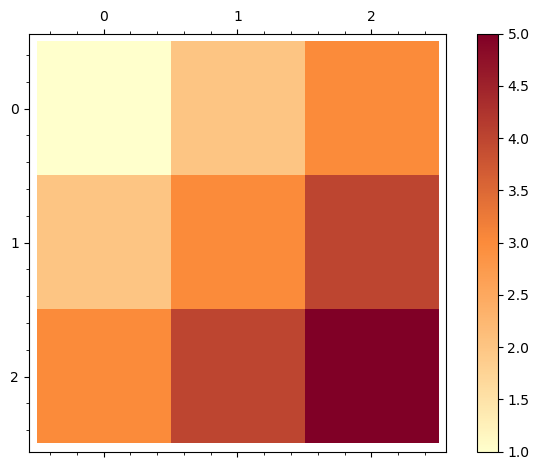

In [4]:
# Création de la matrice de grains de sable
matrice_sable = [[1,2,3], [2,3,4], [3,4,5]]

# Création de l'objet Sandpile à partir de la matrice de grains de sable
s = Sandpile(matrice_sable)

# Affichage de la grille de sable sous forme d'image
s.show()


## 3. Tas instables

Les cases contenant quatre grains de sable ou plus sont **instables** et peuvent se renverser (*topple*). Lors du renversement, quatre grains sont prélevés de la case et se répartissent chez les quatre voisins immédiats de celle-ci ; si des grains tombent hors de la grille, ils sont perdus.

<div class='alert-danger'> <strong> Alerte à la question! </strong> </div>

Implémenter une méthode ```topple(self,i,j)``` qui fait se renverser la case $(i,j)$ de ```self``` si elle est instable. Si la case $(i,j)$ n'est pas instable, rien ne se passe. On convient de numéroter les cases de $(0,0)$ en haut à gauche à $(n-1,n-1)$ en bas à droite.

Par exemple avec le tas ```s``` précédent:

- d'abord ```s.topple(1,2)``` devrait mettre ```s == Sandpile([[1,2,4],[2,4,0],[3,4,6]])``` à ```True```
- puis ```s.topple(1,1)``` devrait mettre ```s == Sandpile([[1,3,4], [3,0,1], [3,5,6]])``` à ```True```

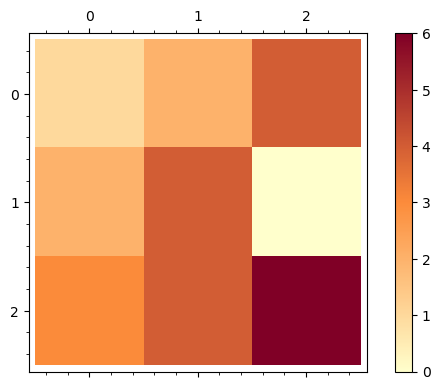

True


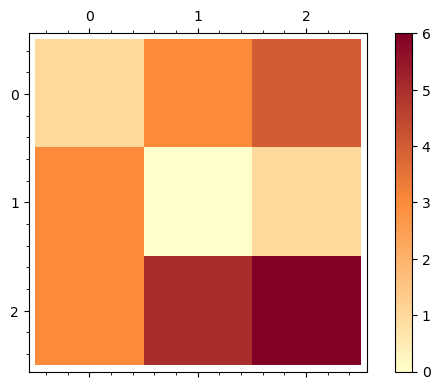

True


In [5]:
s = Sandpile([[1,2,3], [2,3,4], [3,4,5]])

s.topple(1,2)
s.show()
print(s == Sandpile([[1,2,4],[2,4,0],[3,4,6]])) # Doit afficher true


s.topple(1,1)
s.show()
print(s == Sandpile([[1,3,4], [3,0,1], [3,5,6]])) # Doit afficher true

## 4. Stabilisation d'un tas

À force de laisser se renverser les cases instables, on finit par arriver à un tas dans lequel **toutes** les cases sont stables (s'il y a trop de grains sur la grille, ils finiront par tomber en dehors). Le résultat fondament de la théorie est que le tas stable ainsi obtenu **ne dépend pas de l'ordre des renversements effectués**.

<div class='alert-danger'> <strong> Alerte à la question! </strong> </div>

- Implémenter la méthode `stabilize(self)` qui renverse les cases instables une à une tant qu'il en reste. On comptera le nombre de renversements effectués pour atteindre une configuration stable. On testera que le tas ```Sandpile([[1,3,4], [3,0,1], [3,5,6]])``` se stabilise en 6 renversements vers ```Sandpile([[3,0,1],[0,3,3],[1,3,3]])```. 

- Observer la stabilisation du tas de sable $21 \times 21$ dont chaque case contient 2 grains, sauf celle du milieu qui en contient 100. 


 Le tas Sandpile([[1,3,4], [3,0,1], [3,5,6]]) se stabilise en :

[3 0 1]
[0 3 3]
[1 3 3]


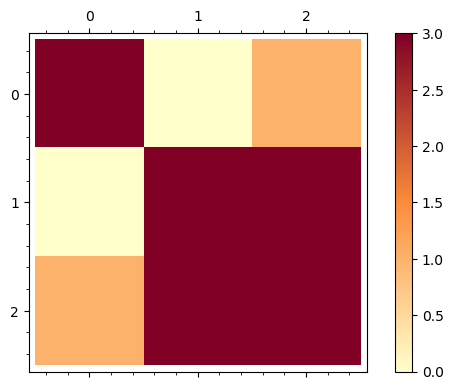


 Nombre de renversements : 6


In [6]:
s = Sandpile([[1,3,4], [3,0,1], [3,5,6]])    # Initialisation de la matrice, suivant la consigne.

nbr_renversements = s.stabilize()

print("\n Le tas Sandpile([[1,3,4], [3,0,1], [3,5,6]]) se stabilise en :\n")
print(s)
s.show()
print("\n Nombre de renversements :", nbr_renversements)

6

Animation with 6 frames
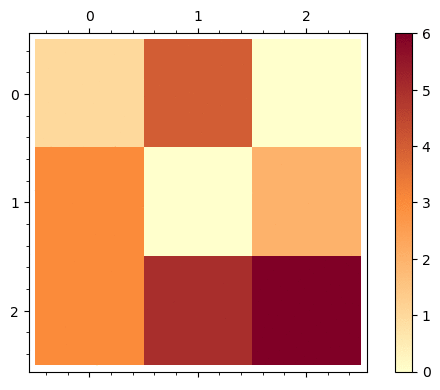

In [18]:
s = Sandpile([[1,3,4], [3,0,1], [3,5,6]])    # Initialisation de la matrice, suivant la consigne.

s.stabilizeAnimate(150)

In [7]:
# Pour augmenter la puissance de calcul, on peut attribuer + ou - de cœurs du processeur à Sage
# Ici, mon PC possède 12 cœurs, ce qui me permet d'attribuer 8 cœurs à la tâche sans crainte.
# Attention cependant si vous comptez lancer cette cellule sur votre PC.

Parallelism().set('tensor', nproc=8)
Parallelism()

Number of processes for parallelization:
 - linbox computations: 1
 - tensor computations: 8

1522

Animation with 304 frames
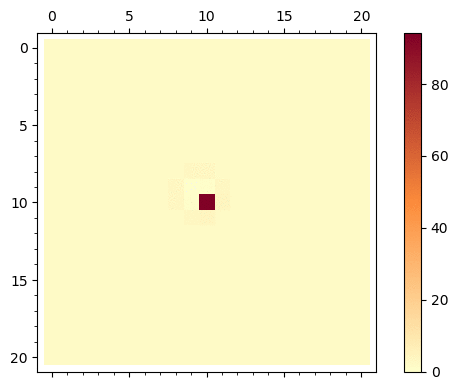

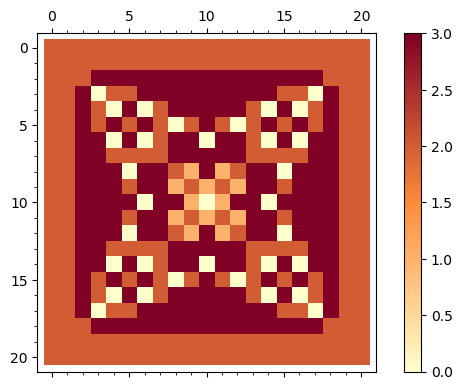

343.33788228034973


In [35]:
### ATTENTION AU TEMPS D'EXÉCUTION DE CETTE CELLULE
#
# Cela prend +40 min d'exécution avec la case du centre = 100 grains.
# Le résultat de l'animation sera donné sous le nom LONG.gif   (oui, je l'ai faite)
#
# Cette attente est due à la fonction animate() qui est lente... 
# Elle génère les .png de chaque matrice avant renversement puis crée une animation. 
# La création des .png ainsi que la création d'un .gif prend énormément de temps...
#
# Les couleurs changent "souvent" car il y a une couleur max et une couleur min en fonction de la matrice ACTUELLE
# Donc les max changent d'une matrice à l'autre, donc les couleurs aussi...
# D'où le résultat, visible sous l'animation, ne contenant que 1, 2 et 3 comme valeur, avec 3 le max, donc le plus foncé.
#
# Le temps d'exécution est visible sous le deuxième graphe, en seconde.

import time

s = Sandpile([[2 for j in range(21)] for i in range(21)])

s.mat[10,10] = 100   # Ici, la valeur du nombre de grains de sable au milieu  (100 = 40min, 30 = 6min)


## Pour limiter le temps d'exécution, on peut afficher uniquement 1 changement sur 5 (par exemple), 
## cela permet de réduire considérablement le nombre d'itérations.
## (les temps donnés au-dessus ont été calculés sans ce changement)
## Ici, seulement 340 sec sont nécessaires à l'affichage de 100 grains au centre (avec 1 image sur 15)


start = time.time()

s.stabilizeAnimate(20)   # Ici, le paramètre concerne le délai entre 2 frames. Défaut : 20 soit 0,2sec.   (100 = 1sec)
s.show()

end = time.time()


print (end-start)    # Le temps d'exécution, en secondes.

## 5. Loi de composition interne

Soient deux tas de sables $s$ et $t$. On définit le tas de sable $s + t$ en: 
- ajoutant case à case tous les grains du tas de sable $t$ au tas de sable $s$ 
- en stabilisant le tas obtenu. 

L'ensemble des tas stables $n \times n$ muni de $+$ a une structure de monoïde commutatif, le neutre étant le tas vide.

<div class='alert-danger'> <strong> Alerte à la question! </strong> </div>

Définir l'opérateur d'addition sur les tas de sable. On notera que ```a+b``` en Python est équivalent à ```a.__add__(b)```. On vérifiera que les tas de sables instanciés sur les matrices: 

$$
\begin{bmatrix}
1 & 1 & 1 & 0 & 1 \\ 
1 & 0 & 3 & 1 & 3 \\ 
0 & 2 & 2 & 2 & 1 \\ 
0 & 1 & 2 & 1 & 0 \\ 
3 & 0 & 0 & 1 & 0 
\end{bmatrix} \qquad \text{ et } \qquad 
\begin{bmatrix}
1 & 0 & 2 & 0 & 3 \\ 
0 & 2 & 2 & 1 & 0 \\ 
3 & 1 & 2 & 1 & 1 \\ 
0 & 0 & 3 & 3 & 3 \\ 
3 & 1 & 3 & 1 & 3 
\end{bmatrix}
$$

donnent, après addition, le tas de sable instancié par la matrice:

$$
\begin{bmatrix}
2 & 3 & 1 & 3 & 1 \\ 
3 & 2 & 3 & 3 & 2 \\ 
1 & 1 & 1 & 2 & 2 \\ 
3 & 3 & 1 & 3 & 3 \\ 
3 & 1 & 0 & 3 & 1 
\end{bmatrix}
$$

In [9]:
a = Sandpile([[1, 1, 1, 0, 1],
               [1, 0, 3, 1, 3],
               [0, 2, 2, 2, 1],
               [0, 1, 2, 1, 0],
               [3, 0, 0, 1, 0]])

b = Sandpile([[1, 0, 2, 0, 3],
               [0, 2, 2, 1, 0],
               [3, 1, 2, 1, 1],
               [0, 0, 3, 3, 3],
               [3, 1, 3, 1, 3]])

print("\na+b :")
result = a + b

resultat_attendu = Sandpile([[2, 3, 1, 3, 1],
                     [3, 2, 3, 3, 2],
                     [1, 1, 1, 2, 2],
                     [3, 3, 1, 3, 3],
                     [3, 1, 0, 3, 1]])

if result == resultat_attendu:
    print("L'addition des tas de sable est correct !")
else:
    print("L'addition des tas de sable est incorrect !")


print("\nL'ensemble des tas stables n x n muni de + a une structure de monoïde commutatif donc faire b+a donne le même résultat : ")
print("\nb+a :")
result = b + a

resultat_attendu = Sandpile([[2, 3, 1, 3, 1],
                     [3, 2, 3, 3, 2],
                     [1, 1, 1, 2, 2],
                     [3, 3, 1, 3, 3],
                     [3, 1, 0, 3, 1]])

if result == resultat_attendu:
    print("L'addition des tas de sable est correct !")
else:
    print("L'addition des tas de sable est incorrect !")

print("\nLe neutre étant le tas vide : a + tas_vide = a :")
print("\na :\n\n", a)
print("\na + tas_vide :\n\n", a + Sandpile([[0]*5 for _ in range(5)]))


a+b :
L'addition des tas de sable est correct !

L'ensemble des tas stables n x n muni de + a une structure de monoïde commutatif donc faire b+a donne le même résultat : 

b+a :
L'addition des tas de sable est correct !

Le neutre étant le tas vide : a + tas_vide = a :

a :

 [1 1 1 0 1]
[1 0 3 1 3]
[0 2 2 2 1]
[0 1 2 1 0]
[3 0 0 1 0]

a + tas_vide :

 [1 1 1 0 1]
[1 0 3 1 3]
[0 2 2 2 1]
[0 1 2 1 0]
[3 0 0 1 0]


## 6. Tas récurrents

Parmi les tas stables, celui dont chaque case contient 3 grains de sable est particulier: il est impossible d'y ajouter quoi que ce soit (sauf le tas vide) **sans créer d'éboulis**. 

Les tas stables obtenus en ajoutant des grains à ce tas stable maximal sont appelés *tas récurrents* car ils ont tendance à apparaître beaucoup plus souvent que ceux qui ne le sont pas. 

**En symboles** : les tas récurrents sont les tas de la forme $s_{\text{max}} + t$, où $s_{\text{max}} $ désigne le tas de sable maximal (trois grains de sable sur chaque case) et $t$ n'importe quel tas.

<div class='alert-info'>  <strong> Théorème </strong> : L'ensemble des tas récurrents forme un monoïde commutatif pour la loi +. </div>

Il n'est pas évident de dire qui est le neutre de ce monoïde. En admettant qu'il existe, on peut le déterminer de la façon suivante :

- le potentiel neutre $s_0$ s'écrit $s_0 = s_{\text{max}}  + t$ où $t$ est à déterminer. 

- le tas maximal $s_{\text{max}}$ est un tas récurrent (car $s_{\text{max}} = s_{\text{max}}  + 0$) donc avec la définition du neutre: 

$$
s_{\text{max}}  + s_0 = s_{\text{max}}  \qquad \text{ soit } \qquad s_{\text{max}}  + (s_{\text{max}}  + t) = s_{\text{max}} 
$$

- cela permet de déterminer $t$ : c'est le tas qu'il faut ajouter à $s_{\text{max}}  + s_{\text{max}}$ pour remplir chaque case à capacité maximale. Autrement dit, $t$ est le complément à $s_{\text{max}}$ du tas stabilisé $s_{\text{max}}  + s_{\text{max}}$. 

On peut vérifier, une fois cette description obtenue, que le tas $s_0 = s_{\text{max}}  + t$ défini ainsi est bien un neutre pour l'ensemble des tas récurrents.

<div class='alert-danger'> <strong> Alerte à la question! </strong> </div>

- Calculer et vérifier que le neutre $s_0$ pour les tas récurrents $5 \times 5$ est le tas de sable correspondant à la matrice: 

$$
\begin{bmatrix}
2 & 3 & 2 & 3 & 2 \\ 
3 & 2 & 1 & 2 & 3 \\ 
2 & 1 & 0 & 1 & 2 \\ 
3 & 2 & 1 & 2 & 3 \\ 
2 & 3 & 2 & 3 & 2 
\end{bmatrix}
$$

- Calculer et afficher le neutre pour les tas récurrents $10 \times 10$. 

#### Reponse

Le théorème énonce que l'ensemble des tas récurrents forme un monoïde commutatif pour la loi $+$.

Un monoïde est une structure algébrique qui consiste en un ensemble muni d'une loi associative et d'un élément neutre. Dans notre cas, l'ensemble est l'ensemble des tas récurrents, la loi est l'addition de tas (notée $+$), et l'élément neutre est le tas $s_0$ défini dans l'énoncé.

Dans notre cas, la loi $+$ est commutative car l'ajout de deux tas est indépendant de l'ordre dans lequel on les ajoute.

Pour déterminer le neutre $s_0$, on utilise la propriété suivante : pour tout tas $s$, $s + s_0 = s$, où $s_0$ est l'élément neutre. En utilisant la définition de $s_0$ donnée dans l'énoncé et la propriété précédente, on obtient :

$$s_{\max} + s_0 = s_{\max}$$

ce qui équivaut à :

$$s_{\max} + (s_{\max} + t) = s_{\max}$$

Pour déterminer $t$, on peut utiliser la propriété suivante : pour tout tas $s$, le tas $s + s_{\max}$ est instable (c'est-à-dire que certaines piles ont plus de $3$ grains de sable). En effet, si une pile a $3$ grains de sable, l'ajout de $3$ grains supplémentaires fait déborder cette pile et renverse des grains sur les piles voisines, ce qui rend ces piles instables à leur tour.

En utilisant cette propriété, on peut déduire que le tas $s_{\max} + s_{\max}$ est instable. Pour le stabiliser, on peut utiliser la méthode stabilize() de la classe Sandpile. Le nombre de renversements nécessaires pour stabiliser ce tas est alors le nombre d'éléments de $t$.

Enfin, on peut définir $t$ comme le complément à $s_{\max}$ du tas stabilisé $s_{\max} + s_{\max}$. Autrement dit, pour chaque case $(i,j)$, on calcule la différence $s_{\max} + s_{\max} - s_{\max}[i,j]$ et on définit $t[i,j]$ comme cette différence.En sommant $t$ et $s_{\max}$, on obtient alors l'élément neutre $s_0$.

[2 3 2 3 2]
[3 2 1 2 3]
[2 1 0 1 2]
[3 2 1 2 3]
[2 3 2 3 2]
True


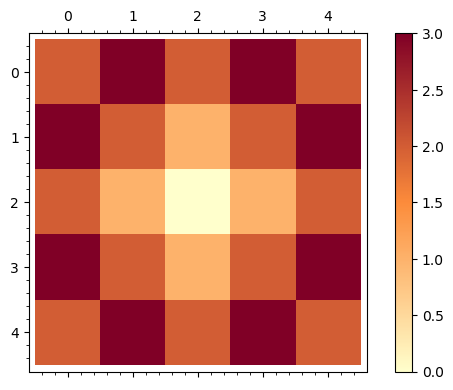

In [13]:
#Détermination du neutre s0 pour les tas récurrents 5x5

#Création du tas maximal smax pour un tas de sable 5x5
s_max = Sandpile([[3 for _ in range(5)] for _ in range(5)])

#Calcul du double du tas maximal, smax+smax
double_s_max = s_max + s_max

#Calcul du complément à smax du tas stabilisé smax+smax pour obtenir le tas t
t = Sandpile([[3 - double_s_max.stabilize2().mat[i, j] for j in range(5)] for i in range(5)])

#Calcul du neutre s0 = smax + t
s_0 = s_max + t

print(s_0.mat)

#Vérification que le neutre s0 est égal à la matrice donnée
print(s_0.mat == matrix([
[2, 3, 2, 3, 2],
[3, 2, 1, 2, 3],
[2, 1, 0, 1, 2],
[3, 2, 1, 2, 3],
[2, 3, 2, 3, 2]
]))
#Résultat attendu : True
s_0.show()

[2 3 3 0 3 3 0 3 3 2]
[3 2 2 1 2 2 1 2 2 3]
[3 2 2 3 3 3 3 2 2 3]
[0 1 3 2 2 2 2 3 1 0]
[3 2 3 2 2 2 2 3 2 3]
[3 2 3 2 2 2 2 3 2 3]
[0 1 3 2 2 2 2 3 1 0]
[3 2 2 3 3 3 3 2 2 3]
[3 2 2 1 2 2 1 2 2 3]
[2 3 3 0 3 3 0 3 3 2]


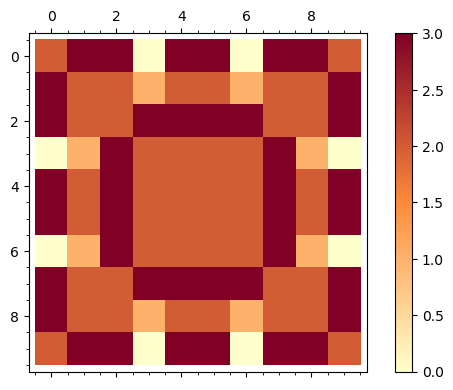

In [38]:
# Détermination du neutre s0 pour les tas récurrents 10x10

# Création du tas maximal smax pour un tas de sable 10x10
s_max = Sandpile([[3 for _ in range(10)] for _ in range(10)])

# Calcul du double du tas maximal, smax+smax
double_s_max = s_max + s_max

# Stabilisation du double du tas maximal
stabilized_double_s_max = double_s_max.stabilize()

#show(stabilized_double_s_max)

# Calcul du complément à smax du tas stabilisé smax+smax pour obtenir le tas t
t = Sandpile([[3 - double_s_max.stabilize2().mat[i, j] for j in range(10)] for i in range(10)])

# Calcul du neutre s0 = smax + t
s_0 = s_max + t

# Affichage du neutre s0 pour les tas récurrents 10x10
print(s_0.mat)

s_0.show()